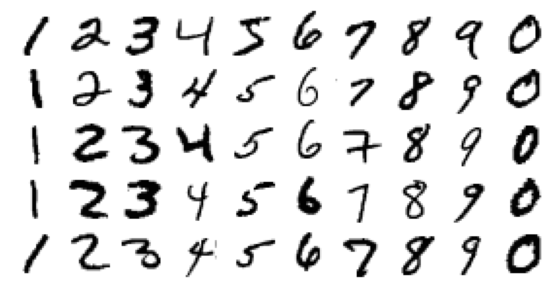

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import pandas as pd


X = np.genfromtxt("hw03_data_points.csv", delimiter = ",")
y = np.genfromtxt("hw03_class_labels.csv", delimiter = ",").astype(int)

i1 = np.hstack((np.reshape(X[np.where(y == 1)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 2)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 3)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 4)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 5)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 6)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 7)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 8)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 9)[0][0:5], :], (28 * 5, 28)),
                np.reshape(X[np.where(y == 10)[0][0:5], :], (28 * 5, 28))))

fig = plt.figure(figsize = (10, 5))
plt.axis("off")
plt.imshow(1 - i1, cmap = "gray")
plt.show()
fig.savefig("hw03_images.pdf", bbox_inches = "tight")

In [3]:
# STEP 3
# first 60000 data points should be included to train
# remaining 10000 data points should be included to test
# should return X_train, y_train, X_test, and y_test
def train_test_split(X, y):
    # your implementation starts below
    X_train = X[:60000, :]
    y_train = y[:60000]
    X_test = X[60000:, :]
    y_test = y[60000:]
    # your implementation ends above
    return(X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
# STEP 4
# assuming that there are N data points and K classes
# should return a numpy array with shape (N, K)
def sigmoid(X, W, w0):
    # your implementation starts below
    scores = 1 / (1 + np.exp(-(np.matmul(X, W) + w0)))
    # your implementation ends above
    return(scores)

In [9]:
# STEP 5
# assuming that there are N data points and K classes
# should return a numpy array with shape (N, K)
def one_hot_encoding(y):
    # your implementation starts below
    N = len(y)
    K = np.max(y_train)
    Y = np.zeros((N, K))
    for i, label in enumerate(y):
        Y[i-1, label-1] = 1
    # your implementation ends above
    return(Y)

np.random.seed(421)
D = X_train.shape[1]
K = np.max(y_train)
Y_train = one_hot_encoding(y_train)
W_initial = np.random.uniform(low = -0.01, high = 0.01, size = (D, K))
w0_initial = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

In [11]:
# STEP 6
# assuming that there are D features and K classes
# should return a numpy array with shape (D, K)
def gradient_W(X, Y_truth, Y_predicted):
    # your implementation starts below
    error = Y_truth - Y_predicted
    gradient = -X.T @ error
    # your implementation ends above
    return(gradient)

# assuming that there are K classes
# should return a numpy array with shape (1, K)
def gradient_w0(Y_truth, Y_predicted):
    # your implementation starts below
    error = Y_truth - Y_predicted
    gradient = -np.sum(error, axis=0)
    # your implementation ends above
    return(gradient)

[[ 0.00365564  0.00606622 -0.0088745  ...  0.00485218 -0.00185243
  -0.00740226]
 [-0.00540071  0.00437433  0.00688369 ...  0.00157982 -0.00679959
   0.00848463]
 [-0.00817134 -0.00092595  0.00148658 ... -0.00699237 -0.00908637
   0.00426942]
 ...
 [-0.00946079 -0.0015333  -0.00975894 ...  0.00032909 -0.00258434
  -0.00681034]
 [-0.00492893  0.00776927 -0.00530092 ... -0.00368244  0.00115995
   0.00444868]
 [ 0.00567408 -0.006186    0.00702124 ... -0.006862    0.00447864
  -0.00451847]]
[[-0.19346578 -1.10012704 -1.34916827 -0.67675424 -0.29292404 -0.89752661
  -0.37574614 -2.74409534 -1.4325888  -1.00147133]]
[75843.61249228 29992.22322111 29867.17107603 25958.27003277
 14519.6571653  13126.07209835 13488.14532009 13000.94968876
 11911.06378029 11835.36096146]


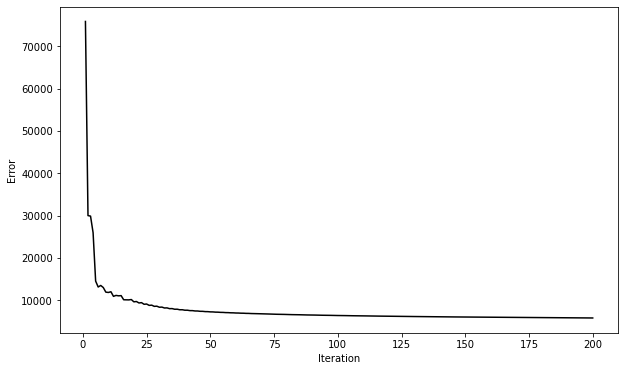

In [12]:
# STEP 7
# assuming that there are N data points and K classes
# should return three numpy arrays with shapes (D, K), (1, K), and (200,)
def discrimination_by_regression(X_train, Y_train,
                                 W_initial, w0_initial):
    eta = 1.0 / X_train.shape[0]
    iteration_count = 200

    W = W_initial
    w0 = w0_initial
        
    # your implementation starts below
    objective_values = []
    for i in range(iteration_count):
        Y_predicted = sigmoid(X_train, W, w0)

        objective_values = np.append(objective_values, (1/2)*(np.sum((Y_train - Y_predicted)**2)))
        
        W = W - eta * gradient_W(X_train, Y_train, Y_predicted)
        w0 = w0 - eta * gradient_w0(Y_train, Y_predicted)
    # your implementation ends above
    return(W, w0, objective_values)

W, w0, objective_values = discrimination_by_regression(X_train, Y_train,
                                                       W_initial, w0_initial)
print(W)
print(w0)
print(objective_values[0:10])



fig = plt.figure(figsize = (10, 6))
plt.plot(range(1, len(objective_values) + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()
fig.savefig("hw03_iterations.pdf", bbox_inches = "tight")

In [14]:
# STEP 8
# assuming that there are N data points
# should return a numpy array with shape (N,)
def calculate_predicted_class_labels(X, W, w0):
    # your implementation starts below
    y_predicted = np.argmax(sigmoid(X, W, w0), axis = 1) + 1
    # your implementation ends above
    return(y_predicted)

y_hat_train = calculate_predicted_class_labels(X_train, W, w0)
print(y_hat_train)

y_hat_test = calculate_predicted_class_labels(X_test, W, w0)
print(y_hat_test)

[ 1  1  1 ... 10 10 10]
[ 1  1  1 ... 10 10 10]


In [16]:
# STEP 9
# assuming that there are K classes
# should return a numpy array with shape (K, K)
def calculate_confusion_matrix(y_truth, y_predicted):
    # your implementation starts below
    K = np.max(y_truth)
    confusion_matrix = np.zeros((K, K), dtype=int)
    for c in range(len(confusion_matrix)):
        for k in range(len(confusion_matrix)):
            confusion_matrix[c,k] = np.sum((y_truth == c+1) & (y_predicted == k+1))
    # your implementation ends above
    return(confusion_matrix)

confusion_train = calculate_confusion_matrix(y_train, y_hat_train)
print(confusion_train)

confusion_test = calculate_confusion_matrix(y_test, y_hat_test)
print(confusion_test)

[[6529   33   21    6   39    8   11   86    8    1]
 [  75 5180   92  119   16  100  110  190   31   45]
 [  45  159 5353    8  195   47   73  144   75   32]
 [  30   45    8 5347    6   54   13   66  261   12]
 [  52   44  255   99 4397  122   27  213  104  108]
 [  23   50    5   33   70 5635    4   56    3   39]
 [  68   80   25   77   11    6 5746   22  194   36]
 [ 168   68  159   33  162   48   25 5041  102   45]
 [  35   38  109  227   41    5  212   65 5172   45]
 [   1   13   12   13   22   42    6   71    5 5738]]
[[1101    2    2    1    1    4    2   22    0    0]
 [   8  901   19   13    0   17   15   46    6    7]
 [   1   22  913    1   24    5   12   18   11    3]
 [   3    6    1  905    1    9    1   10   44    2]
 [   3    3   41   16  733   21   10   39   11   15]
 [   3    4    3    9   12  913    2    4    0    8]
 [  14   27    4    8    2    1  932    2   35    3]
 [  12    8   17   10   24   12   14  860    7   10]
 [  10    6   14   43    7    0   29   13  87